In [23]:
import numpy as np
import sympy as sym 
import matplotlib.pyplot as plt

# Linear regression

In [24]:
def linear_regression(x: np.array, y: np.array) -> np.array:
  if (x.shape[0] != y.shape[0]):
      raise ValueError   
  x = np.column_stack(( np.ones(x.shape[0]), x ))
  w = sym.symbols(f'w:{x.shape[1]}')
  J = np.sum((y - np.dot(x, w))**2)
  result = sym.solve([sym.diff(J, w_index) for w_index in w], w)
  return np.array([result[w_index] for w_index in w])

In [25]:
def linear_regression_gradient(x: np.array, y: np.array, start_vec: np.array, e: float = 0.1) -> np.array:
    if (x.shape[0] != y.shape[0]):
        raise ValueError   
    x = np.column_stack(( np.ones(x.shape[0]), x ))
    w = sym.symbols(f'w:{x.shape[1]}')

    J = np.sum((y - np.dot(x, w))**2)
    grad_J = [sym.diff(J, symbol) for symbol in w]

    vec = np.array([float(i) for i in start_vec])
    res = np.array([float(j.subs({s: n for s, n in zip(w, vec)})) for j in grad_J])
    i = 0
    while (np.linalg.norm(res) > e):
        vec -= step(vec, res, J, w) * res #step * res
        res = np.array([float(j.subs({s: n for s, n in zip(w, vec)})) for j in grad_J])
    return vec    

def step(vec, res, J, w):
    lmbd = sym.symbols('lmbd')
    return float(sym.solve(
        sym.diff(J.subs({s: r for s, r in zip(w, vec - lmbd * res)})), 
        lmbd
    )[0])

In [26]:
size = 100
a = 0.1654132654
b = 1

In [27]:
x = np.array(range(size))
y = np.array([b + a * i for i in x]) + np.random.normal(0, 1, size)

In [28]:
res = linear_regression(x, y)
print(f'{res=}')

res=array([1.21465682078231, 0.163412324406990], dtype=object)


In [29]:
res_grad = linear_regression_gradient(x, y, [1, 1], e=0.001)
print(f'{res_grad=}')

res_grad=array([1.21465552, 0.16341234])


In [30]:
f = np.array([res_grad[0] + i * res_grad[1] for i in x])
print(f)

[ 1.21465552  1.37806786  1.5414802   1.70489255  1.86830489  2.03171724
  2.19512958  2.35854192  2.52195427  2.68536661  2.84877896  3.0121913
  3.17560364  3.33901599  3.50242833  3.66584068  3.82925302  3.99266537
  4.15607771  4.31949005  4.4829024   4.64631474  4.80972709  4.97313943
  5.13655177  5.29996412  5.46337646  5.62678881  5.79020115  5.95361349
  6.11702584  6.28043818  6.44385053  6.60726287  6.77067521  6.93408756
  7.0974999   7.26091225  7.42432459  7.58773693  7.75114928  7.91456162
  8.07797397  8.24138631  8.40479866  8.568211    8.73162334  8.89503569
  9.05844803  9.22186038  9.38527272  9.54868506  9.71209741  9.87550975
 10.0389221  10.20233444 10.36574678 10.52915913 10.69257147 10.85598382
 11.01939616 11.1828085  11.34622085 11.50963319 11.67304554 11.83645788
 11.99987023 12.16328257 12.32669491 12.49010726 12.6535196  12.81693195
 12.98034429 13.14375663 13.30716898 13.47058132 13.63399367 13.79740601
 13.96081835 14.1242307  14.28764304 14.45105539 14.

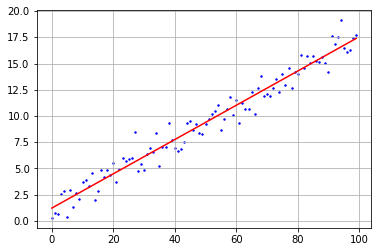

In [31]:
plt.scatter(x, y, s=2, c='blue')
plt.plot(f, c='red')
plt.grid(True)
plt.show()

# Logistic regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
sigmoid = lambda z: 1 / (1 + sym.exp(-z)) 


In [42]:
def logistic_regression(x: np.array, y: np.array, start_vec: np.array, e: float = 0.1) -> np.array:
    if (x.shape[0] != y.shape[0]):
        raise ValueError   
    x = np.column_stack(( np.ones(x.shape[0]), x ))
    w = sym.symbols(f'w:{x.shape[1]}')

    fsigma = lambda z: 1 / (1 + sym.exp(-z)) 
    f = lambda z, y: -y * sym.log(fsigma(z)) - (1 - y) * sym.log(1 - fsigma(z))
    J = np.sum([f(_z, _y) for _z, _y in zip(np.dot(x, w), y)])

    grad_J = [sym.diff(J, symbol) for symbol in w]

    vec = np.array([float(i) for i in start_vec])
    res = np.array([float(j.subs({s: n for s, n in zip(w, vec)})) for j in grad_J])
    while (np.linalg.norm(res) > e):
        vec -= 0.1 * res
        res = np.array([float(j.subs({s: n for s, n in zip(w, vec)})) for j in grad_J])
    return vec

def accuracy(x, y, parameters):
    if (x.shape[0] != y.shape[0]):
        raise ValueError
    x = np.column_stack(( np.ones(x.shape[0]), x ))

    _y = [1 if prob > 0.5 else 0 for prob in np.dot(x, parameters)]

    return np.sum(y == _y) / y.shape[0]


In [43]:
x, y = make_classification(200, 2, 2, 0, weights=[.5, .5], random_state=42)
res_grad = logistic_regression(x[:100,], y[:100], [1, 1, 1], e=0.001)

In [44]:
print(accuracy(x[100:,], y[100:], res_grad))

0.81


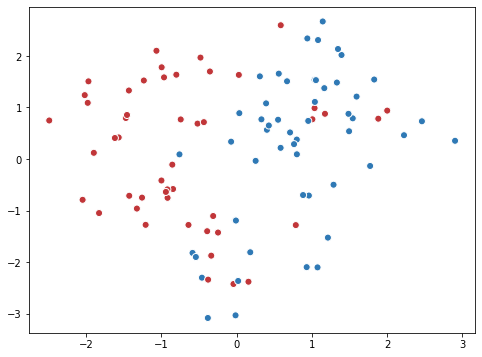

In [39]:
_, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x[100:,0], x[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)